In [1]:
import models
import os
import pandas as pd
from models import get_raw_data, get_rpm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

# pasta ='database/dados_brutos/overhang/ball_fault/0g'
# pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
# pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
# pasta ='database/dados_brutos/underhang/outer_race/35g'

12.0


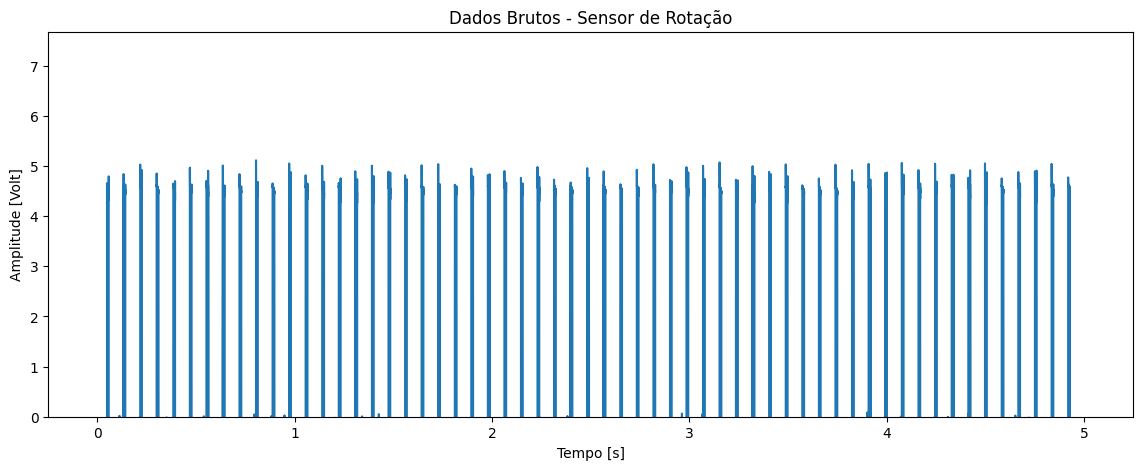

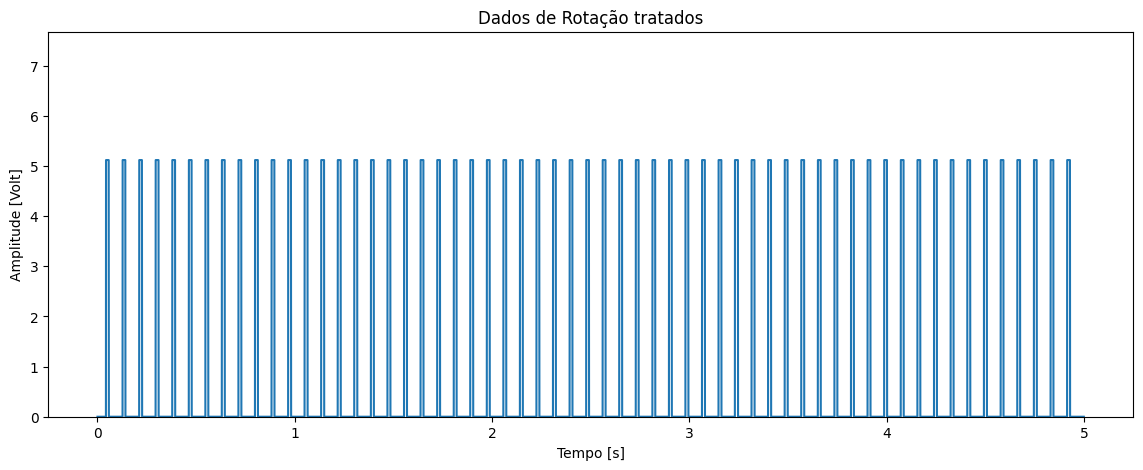

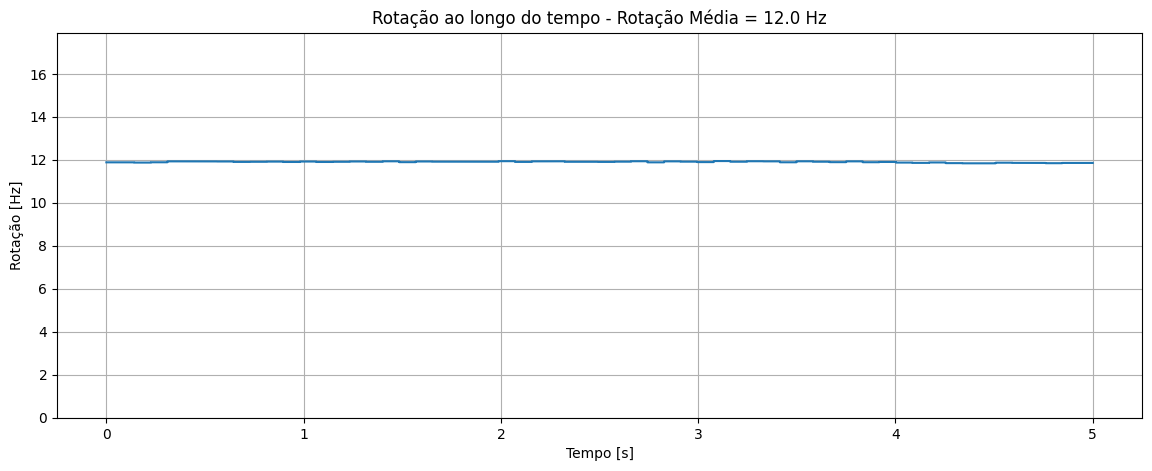

12.0


In [3]:
arquivos = os.listdir(pasta)
rpms = []
tamanho = 150000
arquivo = arquivos[0]

sinal_rpm = get_raw_data.GetData(pasta,arquivo,0).Get()
sinal = get_raw_data.GetData(pasta,arquivo,2).Get()

# sinal_rpm = pd.json_normalize(sinal_rpm)


frequencia_aquisicao = models.freq_aquisicao
n_points = len(sinal_rpm)

t_total = n_points/frequencia_aquisicao

vetor_tempo = np.linspace(0,t_total,n_points)

rpm = get_rpm.GetRPM(sinal_rpm=sinal_rpm,sinal_sensor=sinal)
rpm_ponto = rpm.get_rpm_ponto_a_ponto('hz')
rpm_medio = rpm.get_rpm_medio(unidade='hz')
print(rpm_medio)
rpm.plot_rpm_bruto()
rpm.plot_picos()
rpm.plot_rpm('hz')

print(rpm_medio)


In [4]:
get_rpm.PlotRPMPASTAS(pasta).plot_rpm_pasta_inteira()

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
len(rpms)

In [ ]:
import models
from models import get_raw_data, extrair_indicadores,listar_rpms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

start = time.time()

rpms = listar_rpms.ListaRPM(pasta).Get()
print(rpms)

end = time.time()

elapsed_time = end - start

elapsed_minutes = elapsed_time / 60

print("Tempo de execução: {:.2f} minutos".format(elapsed_minutes))

In [ ]:
import glob 
cur_path = "database/dados_brutos"
arquivos = os.listdir(f'{cur_path}/normal')
arquivo = arquivos[0]

for index,each in enumerate(arquivos):
    new = os.path.splitext(each)[0]
    arquivos[index] = new
    print(new)

In [ ]:
new = os.path.splitext(arquivo)[0]
print(new)